In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt

# reading data into dataframes

bc=pd.read_csv("newest/BTC-USD.csv",index_col=0, parse_dates=True)
usd=pd.read_csv("newest/DX-Y.NYB.csv",index_col=0, parse_dates=True)


In [2]:
bc

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2021-02-24  48835.085938  51290.136719  47213.500000  49705.332031   
2021-02-25  49709.082031  51948.968750  47093.851563  47093.851563   
2021-02-26  47180.464844  48370.785156  44454.843750  46339.761719   
2021-02-27           NaN           NaN           NaN           NaN   
2021-02-28  46032.964844  46528.367188  45879.000000  46528.367188   

               Adj Close        Volume  
Date                                    
2014-09-17    457.334015  2.105680e+07  
2014-09-18    424.440002  3.448320e+07  
2014-09-19    394.795990  3.791970e+07  
2014-09-20    408.903992  3.686360e+07  
2014-09-21    398.821014  2.658010e+07  
...                  ...           ...  
2021-02-24  49705.332031  6.369552e+10  
2021-02-25  47093.851563  5.450657e+10  
2021-02-26  46339.761719  3.509679e+11  
2021-02-27           NaN           NaN  
2021-02-28  46528.367188  4.584082e+10  

[2357 rows x 6 columns]

In [3]:
# Displaying bitcoin dataframe

bc=bc.drop (['Open','High','Low','Adj Close'], axis=1)
bc.tail()

Close        Volume
Date                                  
2021-02-24  49705.332031  6.369552e+10
2021-02-25  47093.851563  5.450657e+10
2021-02-26  46339.761719  3.509679e+11
2021-02-27           NaN           NaN
2021-02-28  46528.367188  4.584082e+10

In [4]:
# Rename the column Close to Price

usd.rename(columns = {'Close':'Price'}, inplace = True)

usd

Open       High        Low      Price  Adj Close  Volume
Date                                                                     
2014-09-17  84.099998  84.709999  83.940002  84.699997  84.699997     0.0
2014-09-18  84.739998  84.739998  84.220001  84.320000  84.320000     0.0
2014-09-19  84.279999  84.800003  84.230003  84.800003  84.800003     0.0
2014-09-21        NaN        NaN        NaN        NaN        NaN     NaN
2014-09-22  84.809998  84.860001  84.519997  84.669998  84.669998     0.0
...               ...        ...        ...        ...        ...     ...
2021-02-22  90.339996  90.580002  90.000000  90.010002  90.010002     0.0
2021-02-23  90.019997  90.260002  89.940002  90.169998  90.169998     0.0
2021-02-24  90.099998  90.430000  89.980003  90.180000  90.180000     0.0
2021-02-25  90.070000  90.290001  89.680000  90.129997  90.129997     0.0
2021-02-26  90.360001  90.970001  90.129997  90.930000  90.930000     0.0

[1959 rows x 6 columns]

In [5]:
join =bc
for x in join.index.values:
	for x2 in usd.index.values:
		if x==x2:
			itemindex=np.where(usd.index==x2)[0][0]
			val=usd.at[x2,'Price']
			join.at[x, 'Price']=val
join.head()

Close      Volume      Price
Date                                         
2014-09-17  457.334015  21056800.0  84.699997
2014-09-18  424.440002  34483200.0  84.320000
2014-09-19  394.795990  37919700.0  84.800003
2014-09-20  408.903992  36863600.0        NaN
2014-09-21  398.821014  26580100.0        NaN

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

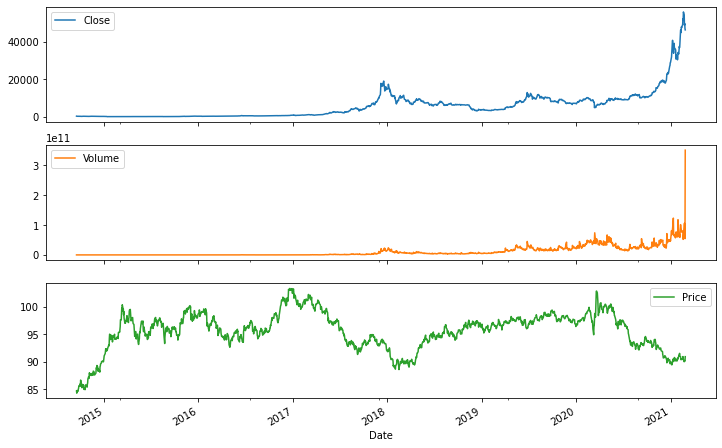

In [6]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

In [7]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
	fig=plt.figure(figsize=figsize)
	layout=(2,2)
	ts_ax= plt.subplot2grid(layout, (0,0))
	hist_ax=plt.subplot2grid(layout, (0,1))
	acf_ax=plt.subplot2grid(layout, (1,0))
	pacf_ax=plt.subplot2grid(layout,(1,1))

	y.plot(ax=ts_ax)
	ts_ax.set_title(title, fontsize=14, fontweight='bold')
	y.plot(ax=hist_ax, kind='hist', bins=25)
	hist_ax.set_title('Histogram')
	smt.graphics.tsa.plot_acf(y,lags=lags, ax=acf_ax)
	smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
	[ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
	plt.tight_layout()
	return ts_ax, acf_ax, pacf_ax

In [8]:
series = join

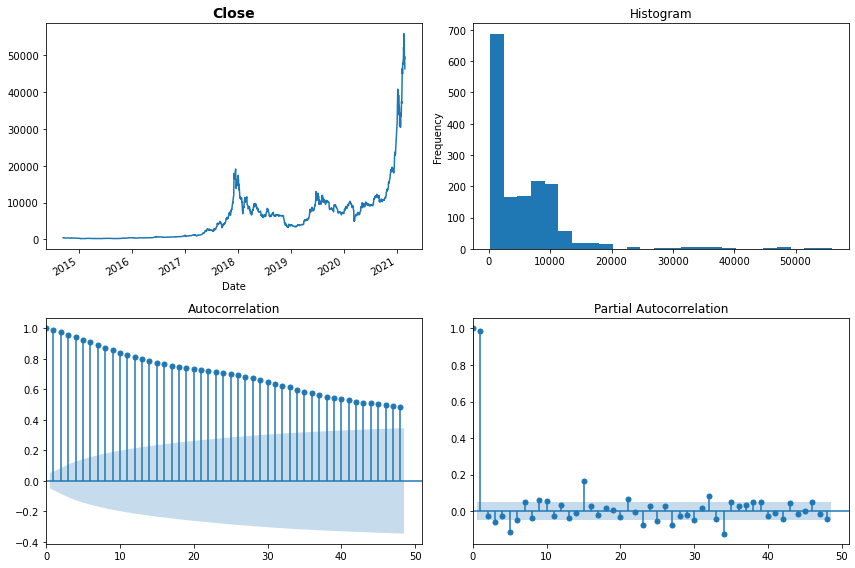

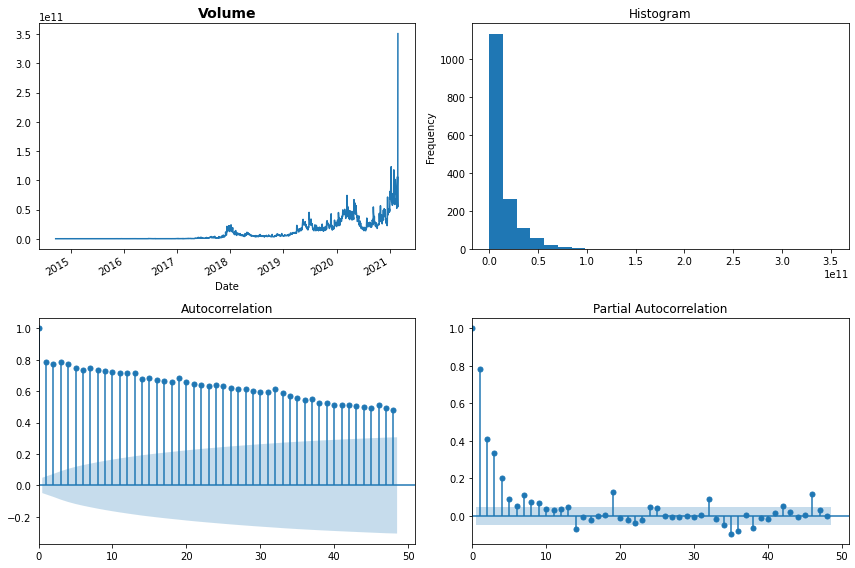

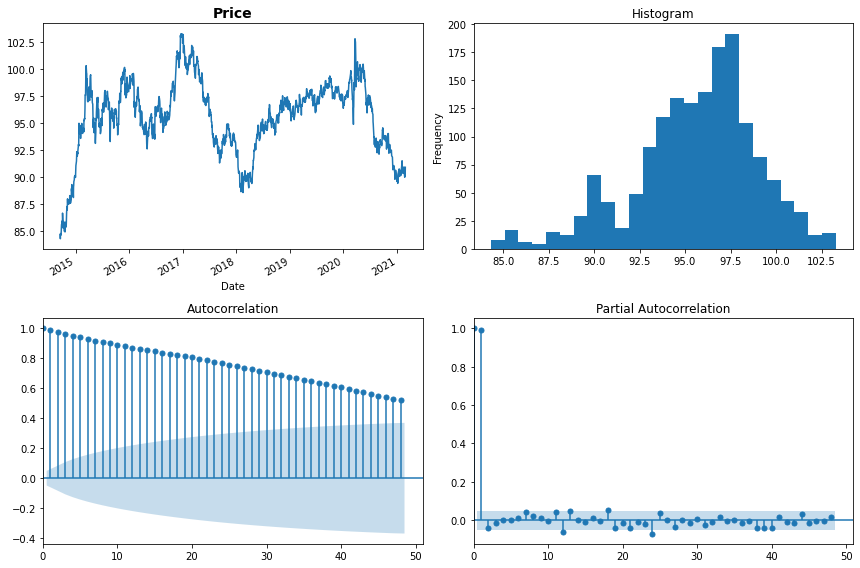

In [9]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
	plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

Close    Volume     Price
0     0.448201  0.393353  0.629064
1     0.533220  0.363485  0.325828
2     0.505407  0.689480  0.476314
3     0.340867  0.270111  0.533841
4     0.447430  0.524224  0.402174
...        ...       ...       ...
1600  0.341651  0.507914  0.428256
1601  0.375010  0.427244  0.550286
1602  0.563539  0.342372  0.422566
1603  0.377119  0.544388  0.440000
1604  0.482340  0.878194  0.615433

[1605 rows x 3 columns]

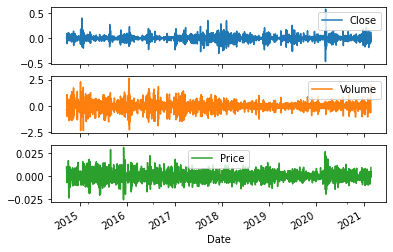

In [10]:
# log transformation

# converting the data to a logaritmic scale

log=pd.DataFrame(np.log(series))

# Differenceing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)


# normalization
# importing minmaxscaler
from sklearn.preprocessing import MinMaxScaler

# creating minmaxscaler object
norm= MinMaxScaler()

# applying norm to dataframe
join_norm=pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

In [11]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
	dftest=adfuller(dataset, autolag="AIC")
	print("1. ADF : ",dftest[0])
	print("2. P-Value : ", dftest[1])
	print("3. Num of Lags:", dftest[2])
	print("4. Num of Observations Used For ADF Regression and Critical Value Calculation :", dftest[3])
	print("5. Critical Values: ")
	for key, val in dftest[4].items():
		print("\t", key, ": ", val)

ad_test(log_diff["Close"])
print("------------------------------------------------------------------------------------")
ad_test(log_diff["Volume"])
print("------------------------------------------------------------------------------------")
ad_test(log_diff["Price"])


1. ADF :  -13.795740212615307
2. P-Value :  8.756730667734858e-26
3. Num of Lags: 23
4. Num of Observations Used For ADF Regression and Critical Value Calculation : 1581
5. Critical Values: 
	 1% :  -3.4344929153128296
	 5% :  -2.8633698507720933
	 10% :  -2.567744178825802
------------------------------------------------------------------------------------
1. ADF :  -15.84945178989083
2. P-Value :  9.486428057698322e-29
3. Num of Lags: 25
4. Num of Observations Used For ADF Regression and Critical Value Calculation : 1579
5. Critical Values: 
	 1% :  -3.4344981713985487
	 5% :  -2.863372170679779
	 10% :  -2.5677454141697496
------------------------------------------------------------------------------------
1. ADF :  -15.181889570656942
2. P-Value :  6.180901634884231e-28
3. Num of Lags: 24
4. Num of Observations Used For ADF Regression and Critical Value Calculation : 1580
5. Critical Values: 
	 1% :  -3.434495541689653
	 5% :  -2.8633710099910963
	 10% :  -2.567744796106393


In [12]:
# Splitting the dataset into train & test subsets

n_obs=7
train, test = log_diff[:-n_obs],log_diff[-n_obs:]
log_diff.head()


Close    Volume     Price
Date                                    
2014-09-19  0.002242 -0.398250  0.010173
2014-09-22  0.090863 -0.547113 -0.007211
2014-09-23  0.061872  1.077629  0.001416
2014-09-24 -0.109639 -1.012481  0.004714
2014-09-25  0.001438  0.254001 -0.002834

In [13]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags=22,ic='aic')
results.summary()


C:\Users\Slam\anaconda3\envs\py3-TF2.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Sep, 2021
Time:                     13:20:32
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.6864
Nobs:                     1583.00    HQIC:                  -19.1147
Log likelihood:           8792.12    FPE:                3.87893e-09
AIC:                     -19.3679    Det(Omega_mle):     3.42534e-09
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000044         0.001198            0.037           0.970
L1.Close          -0.969605         0.025807          -37.571           0.000
L1.Volume          0.006309         0.004368            1.444           

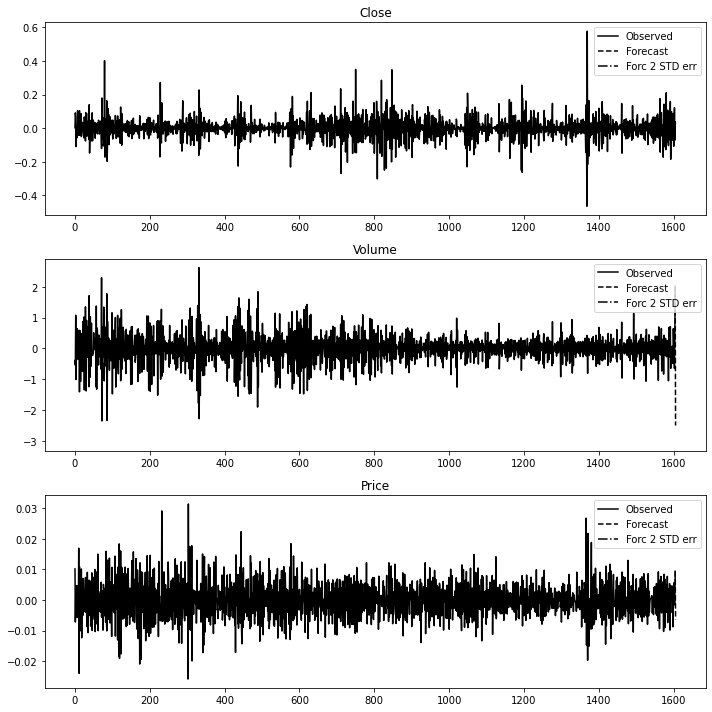

In [14]:
lag_order=results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast=pd.DataFrame(predicted, index= log_diff.index[-n_obs:], columns=log_diff.columns)

# Plotting the Forecasted values
p1= results.plot_forecast(1)
p1.tight_layout()



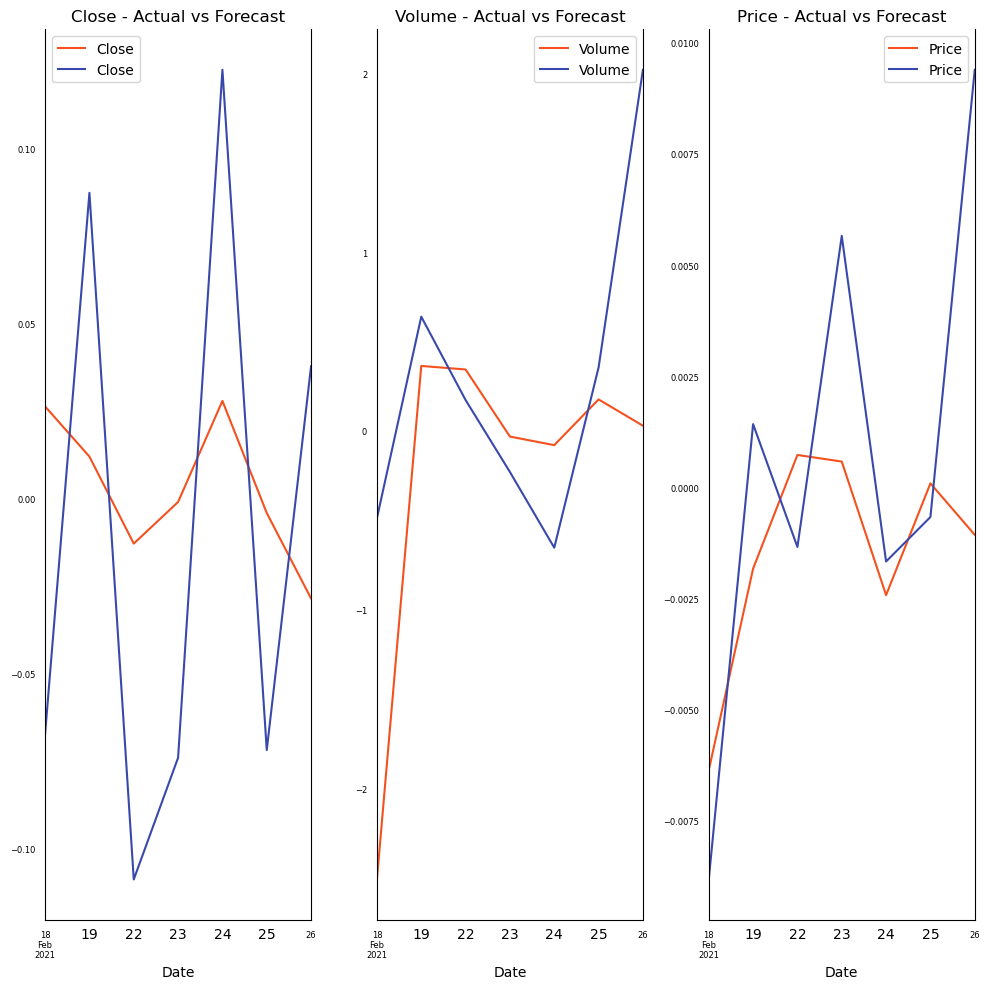

In [15]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows= int(len(log_diff.columns)/2), ncols = 3, dpi=100, figsize=(10,10))

for i, (col, ax) in enumerate(zip(log_diff.columns, axes.flatten())):
    forecast[col].plot(color= '#F4511E', legend=True, ax=ax).autoscale(axis=' x', tight=True)
    test[col].plot(color = '#3949AB', legend=True, ax=ax)

    ax.set_title(col+ ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [16]:
# Orange is Predicted. Blue is actual 

In [17]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse=mean_squared_error(test, forecast)
print("\nMean Squared Error:", mse)


Mean Squared Error: 0.40869335840721505


### XGBoost 

In [18]:
# importing xgboost and train_test_split

import xgboost as xgb
from sklearn.model_selection import train_test_split

# displaying dataset
log_diff.head()

Close    Volume     Price
Date                                    
2014-09-19  0.002242 -0.398250  0.010173
2014-09-22  0.090863 -0.547113 -0.007211
2014-09-23  0.061872  1.077629  0.001416
2014-09-24 -0.109639 -1.012481  0.004714
2014-09-25  0.001438  0.254001 -0.002834

In [19]:
# splitting the dataset into train & test subsets

X,y = log_diff.iloc[:,:],log_diff.iloc[:,:-2]

data_dmatrix=xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=123)


In [20]:
xg_reg=xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth=1, alpha=10, n_estimators=200)

In [21]:
xg_reg.fit(X_train, y_train)

preds=xg_reg.predict(X_test)


[13:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
rmse=np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.030849


### Cross Validation (k-fold)

In [23]:
params = {"objective":"reg:linear", 'colsample_bytree':0.3,'learning_rate':0.1, 'max_depth':2, 'alpha':10}

cv_results=xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)



[13:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.455649        0.000955        0.455647       0.002185
1         0.412022        0.000885        0.412019       0.002294
2         0.372774        0.000834        0.372808       0.002404
3         0.337578        0.000825        0.337622       0.002471
4         0.306036        0.000791        0.306079       0.002552

In [25]:
print((cv_results["test-rmse-mean"]).tail(1))


49    0.045334
Name: test-rmse-mean, dtype: float64


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

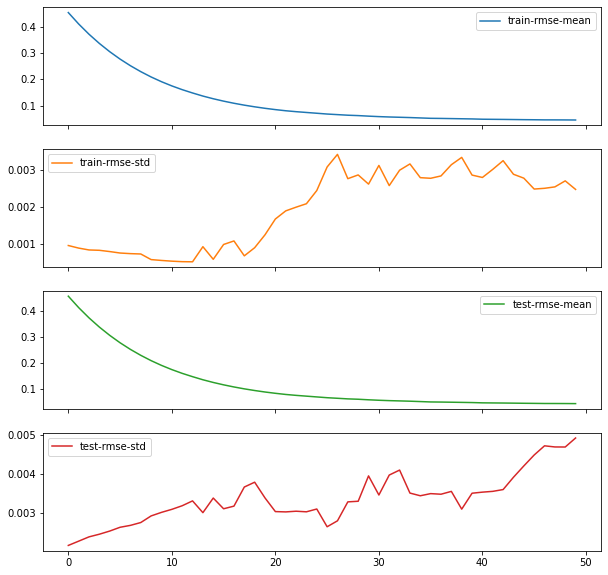

In [26]:
cv_results.plot(subplots=True, figsize=(10,10))

In [27]:
#xgb.plot_tree(xg_reg, num_trees=0)
#plt.rcParams['figure.figsize']=[8,8]
#plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(xg_reg, {'max_depth':[2,4,6],'n_estimators':[50,100,200]},verbose=1,n_jobs=2)
clf.fit(X,y)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[13:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.6886088117324002
{'max_depth': 2, 'n_estimators': 200}


In [29]:
# importing prophet and fitting model

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go


#from fbprophet.plot import plot_plotly
#import plotly.offline as py
#import plotly.graph_objs as go
#py.init_notebook_mode()

In [30]:
# function to automate prophet charts for each series 

def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)


### Bitcoin Closing Price Forecast

In [31]:
bc=pd.read_csv("newest/BTC-USD.csv")

#bc.rename(columns = {'Close':'price'}, inplace = True)
bc_price=bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol=bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns=["ds","y"]
bc_vol.columns=["ds","y"]
bc_price.head()


ds           y
0  2014-09-17  457.334015
1  2014-09-18  424.440002
2  2014-09-19  394.795990
3  2014-09-20  408.903992
4  2014-09-21  398.821014

In [32]:
model, forecast, future = fit_model(bc_price)


In [33]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [34]:
future.tail()

ds
2717 2022-02-24
2718 2022-02-25
2719 2022-02-26
2720 2022-02-27
2721 2022-02-28

In [35]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(790)

ds          yhat    yhat_lower    yhat_upper
1932 2020-01-01   8767.607531   4471.360253  12870.104885
1933 2020-01-02   8910.685076   4469.146256  13105.220160
1934 2020-01-03   9117.885178   4903.259018  13357.551347
1935 2020-01-04   9185.313858   4883.392856  13607.670010
1936 2020-01-05   9339.371057   5312.421744  13555.087456
1937 2020-01-06   9431.666786   4850.591920  13508.820952
1938 2020-01-07   9504.607970   5246.688293  13614.605349
1939 2020-01-08   9588.743545   5437.058617  13971.122888
1940 2020-01-09   9632.790974   5471.034880  14160.256232
1941 2020-01-10   9732.450079   5610.135080  13826.850858
1942 2020-01-11   9685.999605   5156.822760  14003.708113
1943 2020-01-12   9722.254825   5548.835298  14439.678637
1944 2020-01-13   9695.428188   5118.800685  13896.157256
1945 2020-01-14   9650.654166   5316.877323  13790.358600
1946 2020-01-15   9621.267340   5566.197408  13941.505715
1947 2020-01-16   9558.758620   5318.925005  13624.753996
1948 2020-01-17   9561.517270   5262.582844  13814.284179
1949 2020-01-18   9430.356038   5131.978289  13641.005703
1950 2020-01-19   9396.399607   5360.235154  14145.971783
1951 2020-01-20   9315.880244   5077.674841  13764.705883
1952 2020-01-21   9235.603580   5025.044148  13481.834613
1953 2020-01-22   9190.175247   5403.192608  13773.856113
1954 2020-01-23   9131.914739   4888.460456  13365.506066
1955 2020-01-24   9159.565443   4836.748694  13653.937991
1956 2020-01-25   9073.799174   4901.315394  13421.727687
1957 2020-01-26   9105.096137   4951.178886  13372.728251
1958 2020-01-27   9108.544631   4848.581588  13326.030222
1959 2020-01-28   9129.323534   4672.711501  13176.244694
1960 2020-01-29   9199.958056   4691.885774  13466.532770
1961 2020-01-30   9270.274584   4836.317484  13373.027553
1962 2020-01-31   9436.162685   5219.524523  13642.496017
1963 2020-02-01   9495.141444   5181.877324  13932.404917
1964 2020-02-02   9674.309622   5355.527228  13917.577062
1965 2020-02-03   9825.222286   5799.757348  14009.875983
1966 2020-02-04   9989.455089   5609.355622  14067.001247
1967 2020-02-05  10195.944691   6023.432617  14548.525509
1968 2020-02-06  10391.029049   6213.586162  14714.383104
1969 2020-02-07  10667.293510   6269.134788  15208.739270
1970 2020-02-08  10819.217766   6916.738062  14907.631701
1971 2020-02-09  11071.201121   6815.580595  15361.061970
1972 2020-02-10  11272.506802   7355.540790  15590.173183
1973 2020-02-11  11462.884738   7172.159016  15570.432901
1974 2020-02-12  11669.959800   7613.119944  15953.321628
1975 2020-02-13  11839.307960   7757.997862  15914.774083
1976 2020-02-14  12063.325357   7724.722360  16669.551178
1977 2020-02-15  12136.884672   8015.410503  16397.917081
1978 2020-02-16  12285.355990   7853.701427  16701.476095
1979 2020-02-17  12359.532920   8218.774337  16127.601971
1980 2020-02-18  12401.223797   8227.312556  16614.441610
1981 2020-02-19  12440.595715   8560.785921  16920.581143
1982 2020-02-20  12426.194885   7957.526824  16879.309401
1983 2020-02-21  12453.749678   8223.434995  16629.952017
1984 2020-02-22  12321.752362   8239.163570  16789.433670
1985 2020-02-23  12259.398541   8114.557318  16392.157468
1986 2020-02-24  12121.427046   7852.833614  16379.694654
1987 2020-02-25  11953.622265   7654.063908  16277.047080
1988 2020-02-26  11790.068778   7472.940162  16173.858584
1989 2020-02-27  11583.084029   7284.907241  15536.897885
1990 2020-02-28  11431.937515   6935.240047  15689.928321
1991 2020-02-29  11138.354525   7109.575174  15454.584871
1992 2020-03-01  10934.385329   6551.486006  15535.420935
1993 2020-03-02  10677.184236   6395.614573  14894.248497
1994 2020-03-03  10414.461930   6121.094887  14681.982251
1995 2020-03-04  10181.702112   5970.977951  14579.561924
1996 2020-03-05   9932.069003   5850.875221  13918.787865
1997 2020-03-06   9765.114689   5576.618735  14223.563767
1998 2020-03-07   9482.284536   5227.254163  13889.397136
1999 2020-03-08   9314.801365   4752.763990  13828.358956
2000 2020-0

In [36]:
forecast.shape

(2722, 22)

In [37]:
fb_plots(model, forecast)


(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

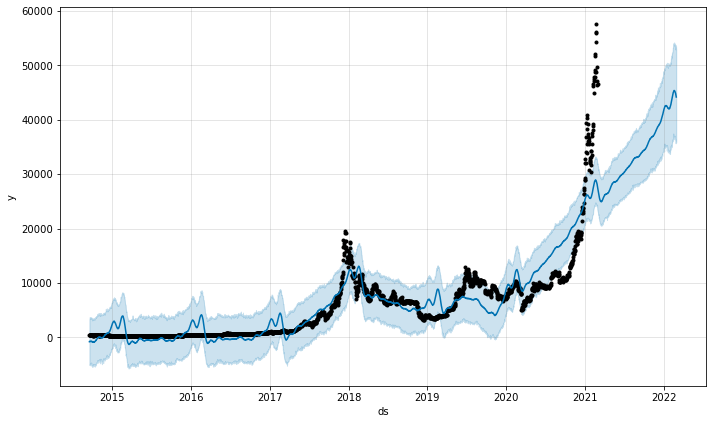

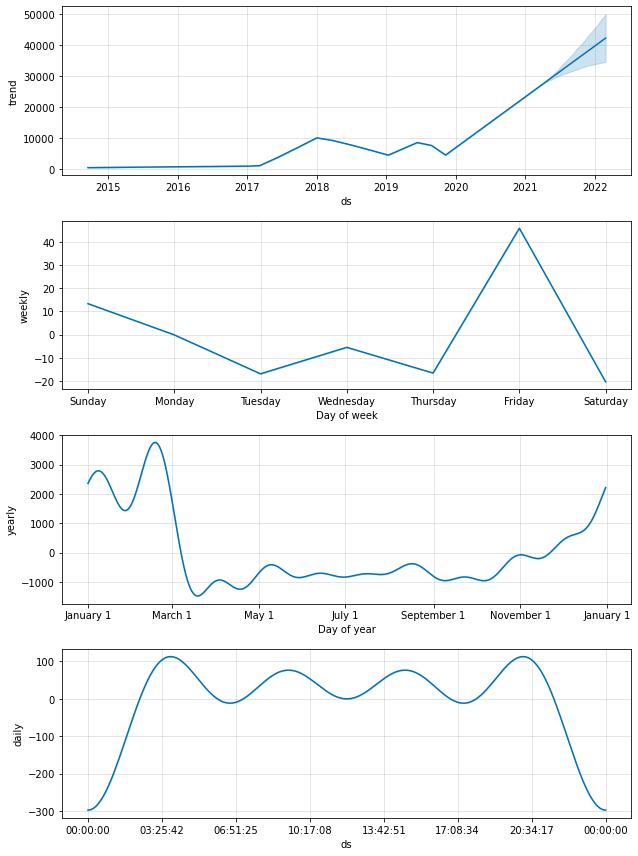

In [38]:
fb_subplots(model, forecast)


### US Price Forecast

In [39]:
usd=pd.read_csv("newest/DX-Y.NYB.csv")
usd = usd.drop(usd.columns[[2,3,4,5,6]], axis=1)
usd.columns = ["ds","y"]
usd.head()


ds          y
0  2014-09-17  84.099998
1  2014-09-18  84.739998
2  2014-09-19  84.279999
3  2014-09-21        NaN
4  2014-09-22  84.809998

In [40]:
model, forecast, future=fit_model(usd)

In [41]:
future.tail()

ds
2319 2022-02-22
2320 2022-02-23
2321 2022-02-24
2322 2022-02-25
2323 2022-02-26

In [42]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


ds       yhat  yhat_lower  yhat_upper
2319 2022-02-22  84.663093   62.210349  106.352469
2320 2022-02-23  84.726189   62.971293  106.839048
2321 2022-02-24  84.770664   62.780489  107.276181
2322 2022-02-25  84.831475   62.789726  106.698033
2323 2022-02-26  84.673382   62.014572  107.098059

In [43]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

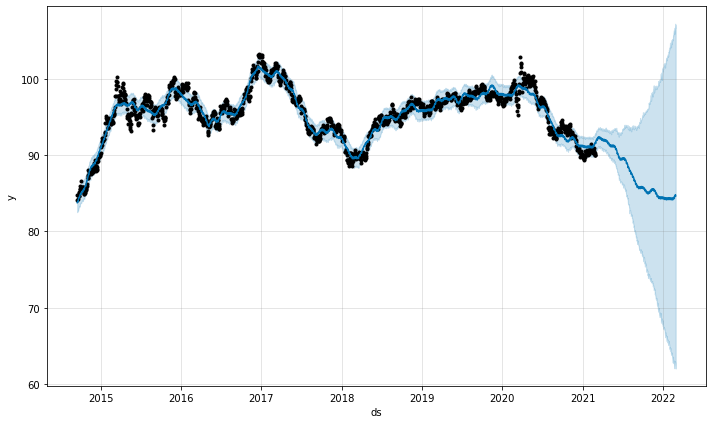

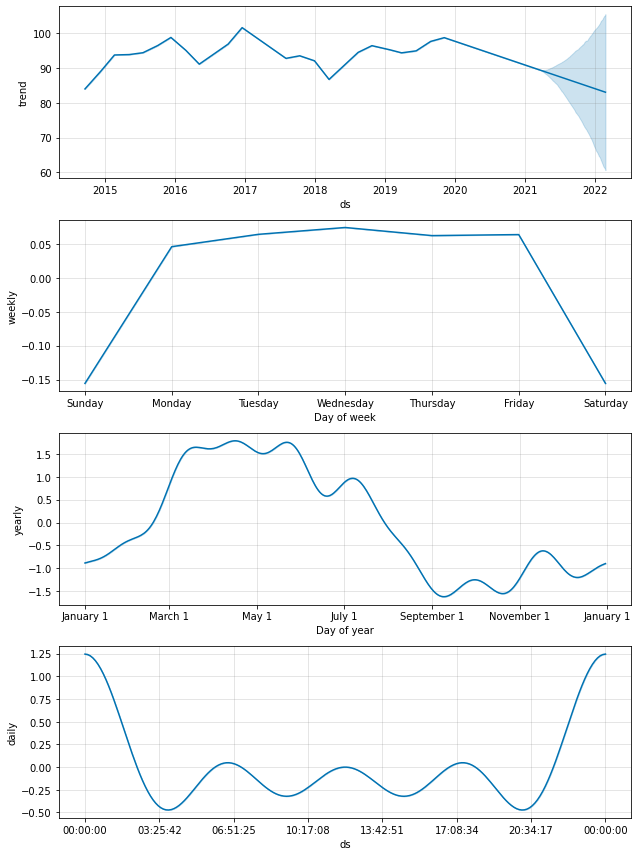

In [44]:
fb_subplots(model, forecast)


### Bitcoin Volume Forecast

In [45]:
bc_vol.head()

ds           y
0  2014-09-17  21056800.0
1  2014-09-18  34483200.0
2  2014-09-19  37919700.0
3  2014-09-20  36863600.0
4  2014-09-21  26580100.0

In [46]:
model, forecast, future = fit_model(bc_vol)

In [47]:
#forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

forecast[['ds','yhat','yhat_lower','yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0    2014-09-17 -7.280469e+08 -1.249311e+10  1.025299e+10
1    2014-09-18 -5.306488e+08 -1.226073e+10  1.133559e+10
2    2014-09-19 -2.257773e+08 -1.217428e+10  1.207890e+10
3    2014-09-20 -2.611256e+09 -1.454332e+10  9.195653e+09
4    2014-09-21 -2.819260e+09 -1.450608e+10  8.118288e+09
5    2014-09-22 -1.656212e+09 -1.230772e+10  9.777998e+09
6    2014-09-23 -1.961023e+09 -1.385948e+10  9.052143e+09
7    2014-09-24 -2.020372e+09 -1.330645e+10  9.398621e+09
8    2014-09-25 -1.888447e+09 -1.354063e+10  9.850471e+09
9    2014-09-26 -1.625075e+09 -1.352184e+10  9.530307e+09
10   2014-09-27 -4.026738e+09 -1.556347e+10  7.691477e+09
11   2014-09-28 -4.224845e+09 -1.580187e+10  7.496748e+09
12   2014-09-29 -3.025659e+09 -1.432249e+10  7.336689e+09
13   2014-09-30 -3.268541e+09 -1.483186e+10  9.318973e+09
14   2014-10-01 -3.241219e+09 -1.568543e+10  8.185413e+09
15   2014-10-02 -2.999513e+09 -1.419411e+10  8.902380e+09
16   2014-10-03 -2.605425e+09 -1.376042e+10  9.025164e+09
17   2014-10-04 -4.858100e+09 -1.750700e+10  6.309548e+09
18   2014-10-05 -4.892041e+09 -1.686546e+10  6.811352e+09
19   2014-10-06 -3.516951e+09 -1.471958e+10  8.365597e+09
20   2014-10-07 -3.575901e+09 -1.507519e+10  7.853391e+09
21   2014-10-08 -3.360506e+09 -1.474001e+10  8.712073e+09
22   2014-10-09 -2.930549e+09 -1.482726e+10  8.885943e+09
23   2014-10-10 -2.351976e+09 -1.378371e+10  9.616654e+09
24   2014-10-11 -4.427763e+09 -1.609879e+10  6.771024e+09
25   2014-10-12 -4.296027e+09 -1.659445e+10  7.206999e+09
26   2014-10-13 -2.769790e+09 -1.433518e+10  7.979451e+09
27   2014-10-14 -2.695057e+09 -1.455711e+10  8.985909e+09
28   2014-10-15 -2.365922e+09 -1.364184e+10  8.681756e+09
29   2014-10-16 -1.844137e+09 -1.322737e+10  9.821734e+09
30   2014-10-17 -1.197059e+09 -1.192719e+10  1.032595e+10
31   2014-10-18 -3.228480e+09 -1.409037e+10  7.908382e+09
32   2014-10-19 -3.076736e+09 -1.522602e+10  8.417974e+09
33   2014-10-20 -1.554455e+09 -1.304919e+10  1.010469e+10
34   2014-10-21 -1.506663e+09 -1.281837e+10  9.801060e+09
35   2014-10-22 -1.225922e+09 -1.257941e+10  1.069001e+10
36   2014-10-23 -7.719371e+08 -1.265657e+10  1.060041e+10
37   2014-10-24 -2.095715e+08 -1.173542e+10  1.157002e+10
38   2014-10-25 -2.339748e+09 -1.407993e+10  8.984945e+09
39   2014-10-26 -2.297634e+09 -1.327819e+10  1.003093e+10
40   2014-10-27 -8.924863e+08 -1.285586e+10  1.042048e+10
41   2014-10-28 -9.658468e+08 -1.296462e+10  1.050749e+10
42   2014-10-29 -8.067779e+08 -1.185153e+10  1.058145e+10
43   2014-10-30 -4.715711e+08 -1.278882e+10  1.084278e+10
44   2014-10-31 -2.184968e+07 -1.147165e+10  1.131660e+10
45   2014-11-01 -2.255564e+09 -1.379345e+10  1.112563e+10
46   2014-11-02 -2.305254e+09 -1.350826e+10  9.402544e+09
47   2014-11-03 -9.779690e+08 -1.221940e+10  1.047940e+10
48   2014-11-04 -1.113518e+09 -1.303682e+10  1.075106e+10
49   2014-11-05 -9.997519e+08 -1.254184e+10  1.002418e+10
50   2014-11-06 -6.923023e+08 -1.199070e+10  1.182166e+10
51   2014-11-07 -2.526975e+08 -1.203589e+10  1.273824e+10
52   2014-11-08 -2.479356e+09 -1.321677e+10  9.055539e+09
53   2014-11-09 -2.505829e+09 -1.477017e+10  9.342094e+09
54   2014-11-10 -1.140690e+09 -1.380458e+10  1.073633e+10
55   2014-11-11 -1.225727e+09 -1.279441e+10  1.032192e+10
56   2014-11-12 -1.051174e+09 -1.224915e+10  1.112598e+10
57   2014-11-13 -6.753634e+08 -1.178605e+10  1.186104e+10
58   2014-11-14 -1.627645e+08 -1.209184e+10  1.036582e+10
59   2014-11-15 -2.314882e+09 -1.414588e+10  9.370748e+09
60   2014-11-16 -2.268406e+09 -1.450316e+10  9.349728e+09
61   2014-11-17 -8.349949e+08 -1.213622e+10  1.100205e+10
62   2014-11-18 -8.593786e+08 -1.250176e+10  1.025584e+10
63   2014-11-19 -6.344867e+08 -1.137210e+10  1.049466e+10
64   2014-11-20 -2.210207e+08 -1.186967e+10  1.167093e+10
65   2014-11-21  3.145921e+08 -1.100750e+10  1.186042e+10
66   2014-11-22 -1.830634e+09 -1.327278e+10  1.013467e+10
67   2014-11-23 -1.794334e+09 -1.340477e+10  1.018644e+10
68   2014-1

In [48]:
fb_plots(model,forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

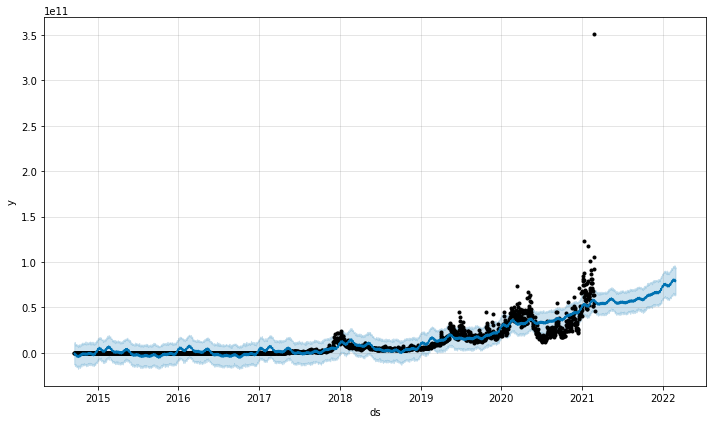

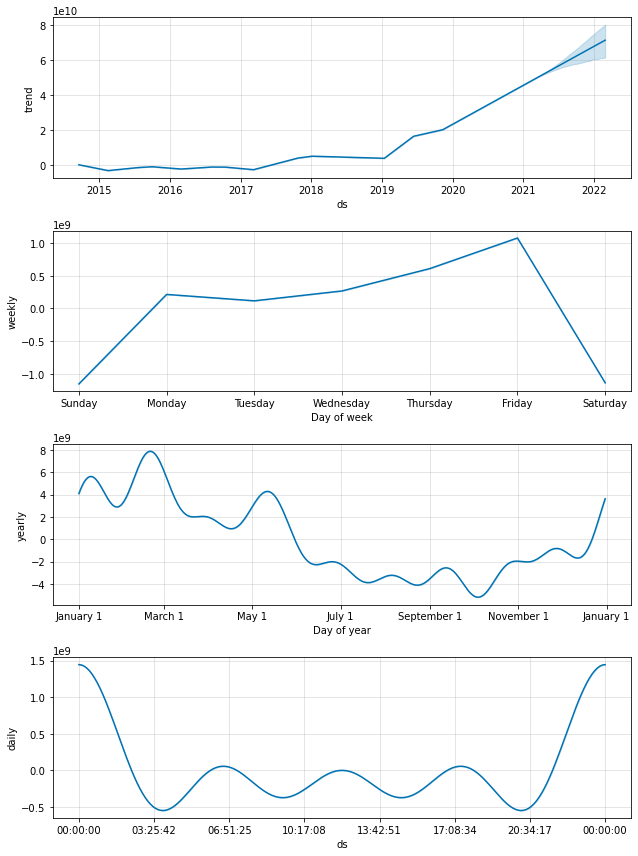

In [49]:
fb_subplots(model, forecast)